# 서브플롯

Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [29]:
import sys
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [30]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 5
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [76]:
origin = read_excel("https://data.hossam.kr/pydata/traffic_acc.xlsx",index_col = '년도')

origin.drop(columns='월',inplace=True)
origin = origin.groupby('년도').mean()
origin

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


## #02. 서브플롯의 기본 사용

### [1] 서브플롯 영역 나누기

2행 3열을 갖는 서브플롯 영역을 구성한다.

```python
pyplot.subplots(행, 열 [, figsize = (가로, 세로)])
```

`plt.subplots()` 메서드에 의해 리턴되는 `fig`는 그래픽 처리 기능을 제공하는 객체이다.

`plt.subplots()` 메서드에 의해 리턴되는 `ax`객체는 분할된 각 그래프 영역의 객체를 저장하고 있는 리스트이다.

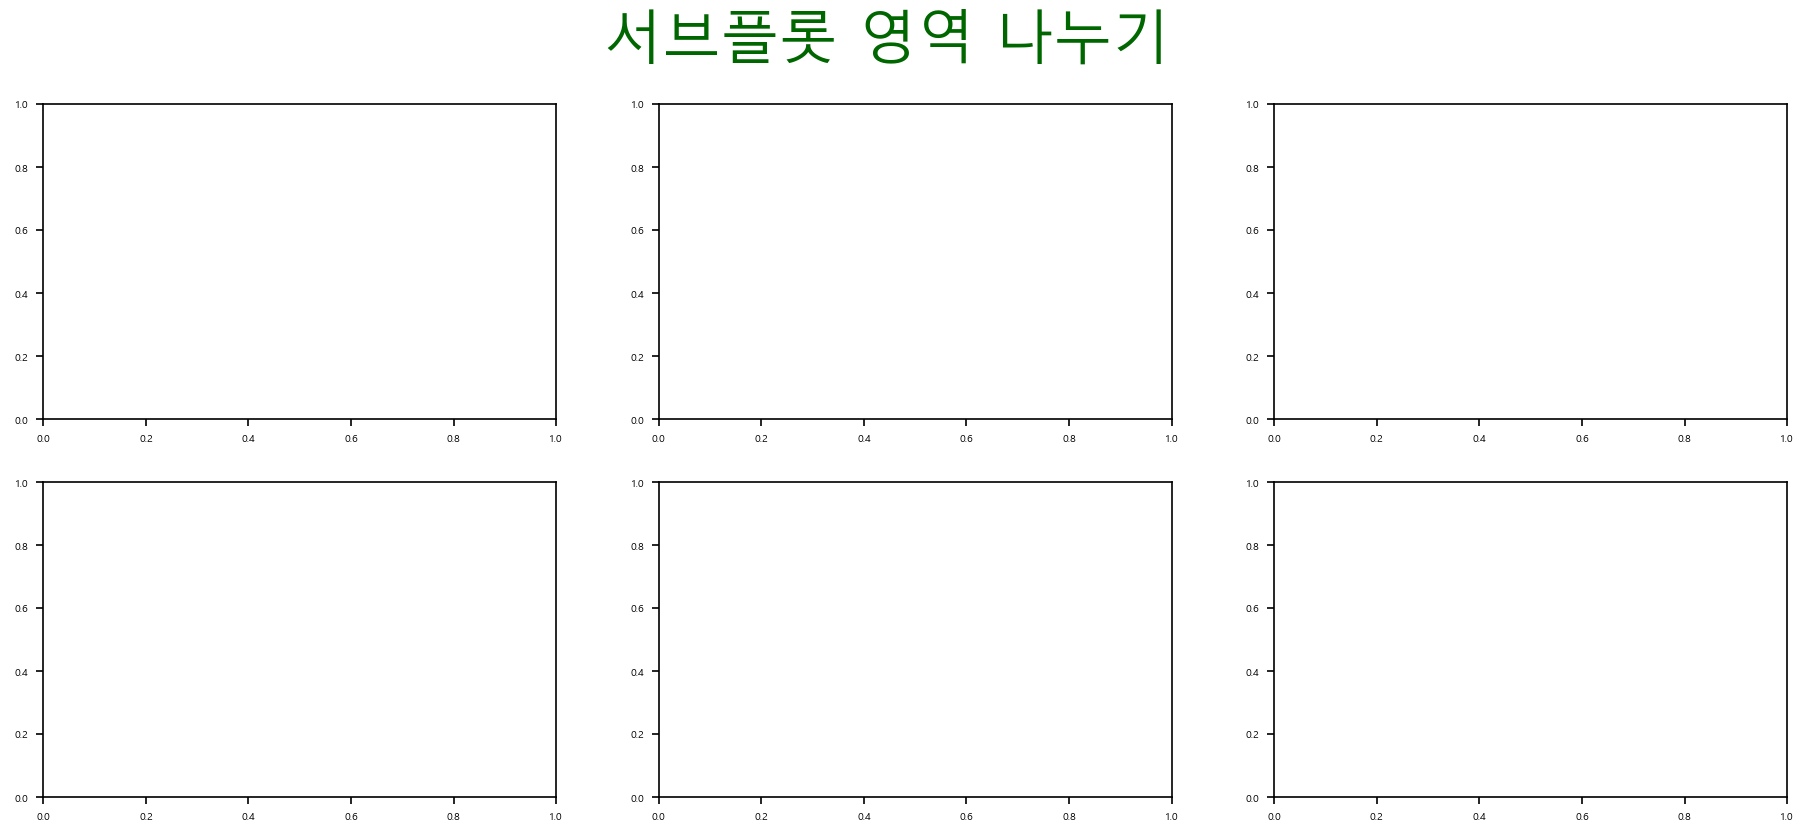

In [77]:
# 서브플롯 생성
fig, ax = plt.subplots(2, 3)
ax # array([[<Axes: >, <Axes: >, <Axes: >],[<Axes: >, <Axes: >, <Axes: >]] (2행, 3열의 그래프)

# 전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color='#006600')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2) # 따로 지정하지 않으면 알아서 파이썬이 나눠줌

plt.show()
plt.close()

### [2] 서브플롯에 그래프 그리기

2행 3열을 갖는 서브플롯 영역 안에 개별 그래프 표시하기

`plt.subplots()` 메서드의 결과로 `ax`에 반환되는 객체는 서브플롯의 행,열에 대한 리스트이다.

`plt.subplots()` 메서드에 전달하는 `figsize` 파라미터는 그래픽의 크기. plt.rcParams["figure.figsize"] 설정보다 우선한다.

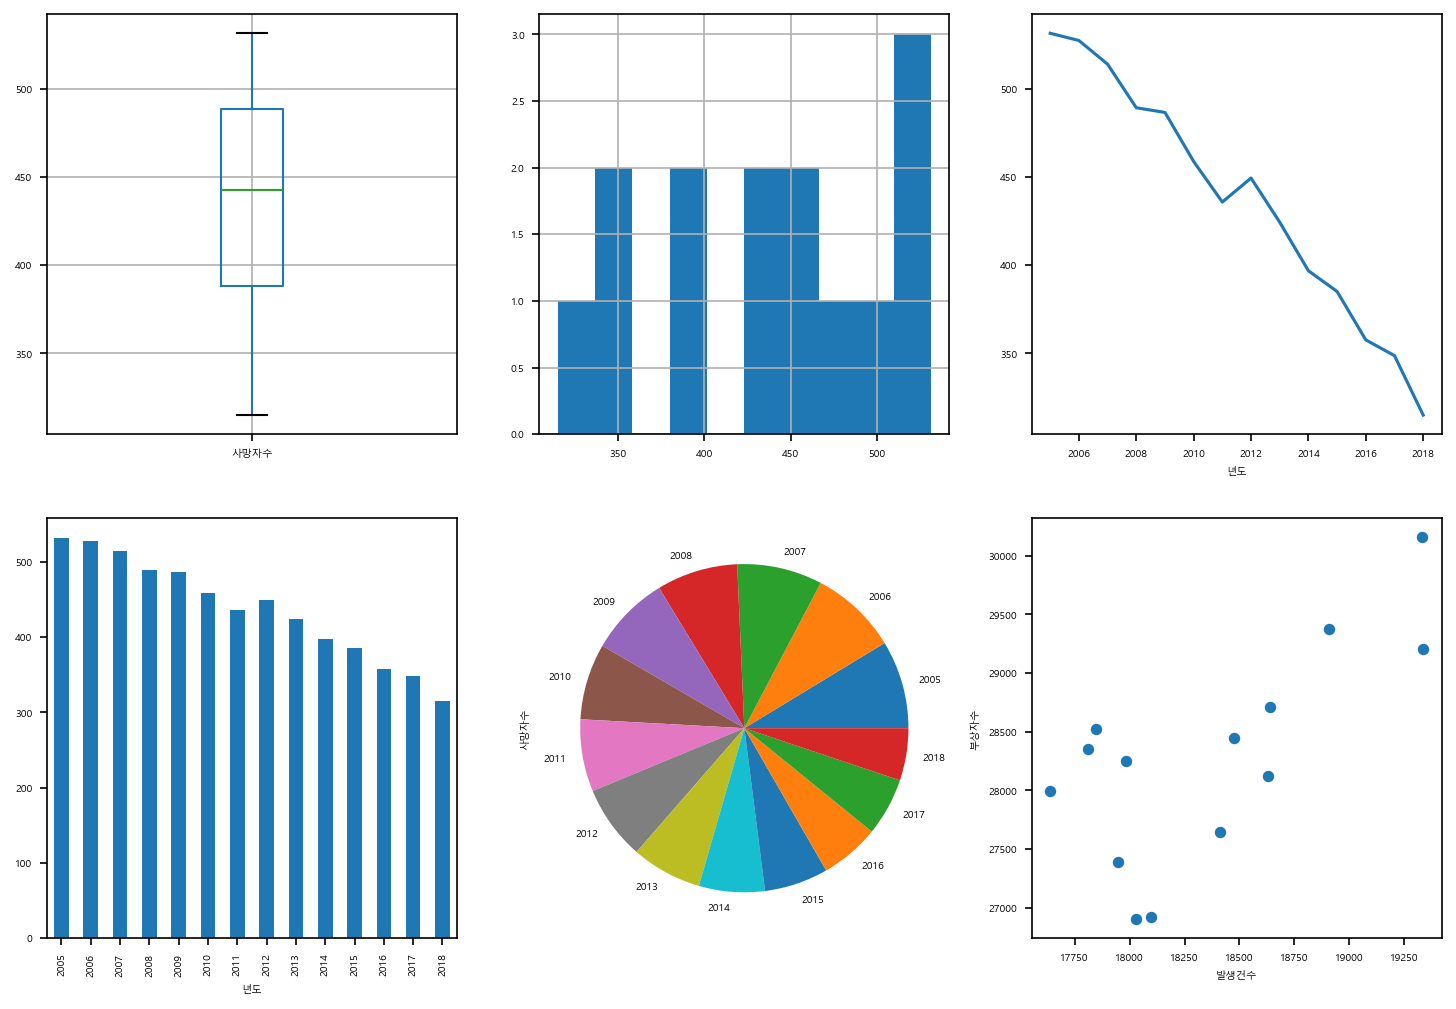

In [78]:
# 서브플롯 생성
fig, ax = plt.subplots(2, 3, figsize=(12, 8))


# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
origin.boxplot('사망자수', ax = ax[0][0])                   # 박스
origin['사망자수'].hist(ax=ax[0][1])                        # 히스토그램
origin['사망자수'].plot(ax=ax[0][2])                        # 선
origin['사망자수'].plot.bar(ax=ax[1][0])                    # 막대
origin['사망자수'].plot.pie(ax=ax[1][1])                    # 파이
origin.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][2]) # 산점도

# 그래프 출력하기
plt.show()
plt.close()

## #04. 서브플롯 영역에 옵션 지정하기

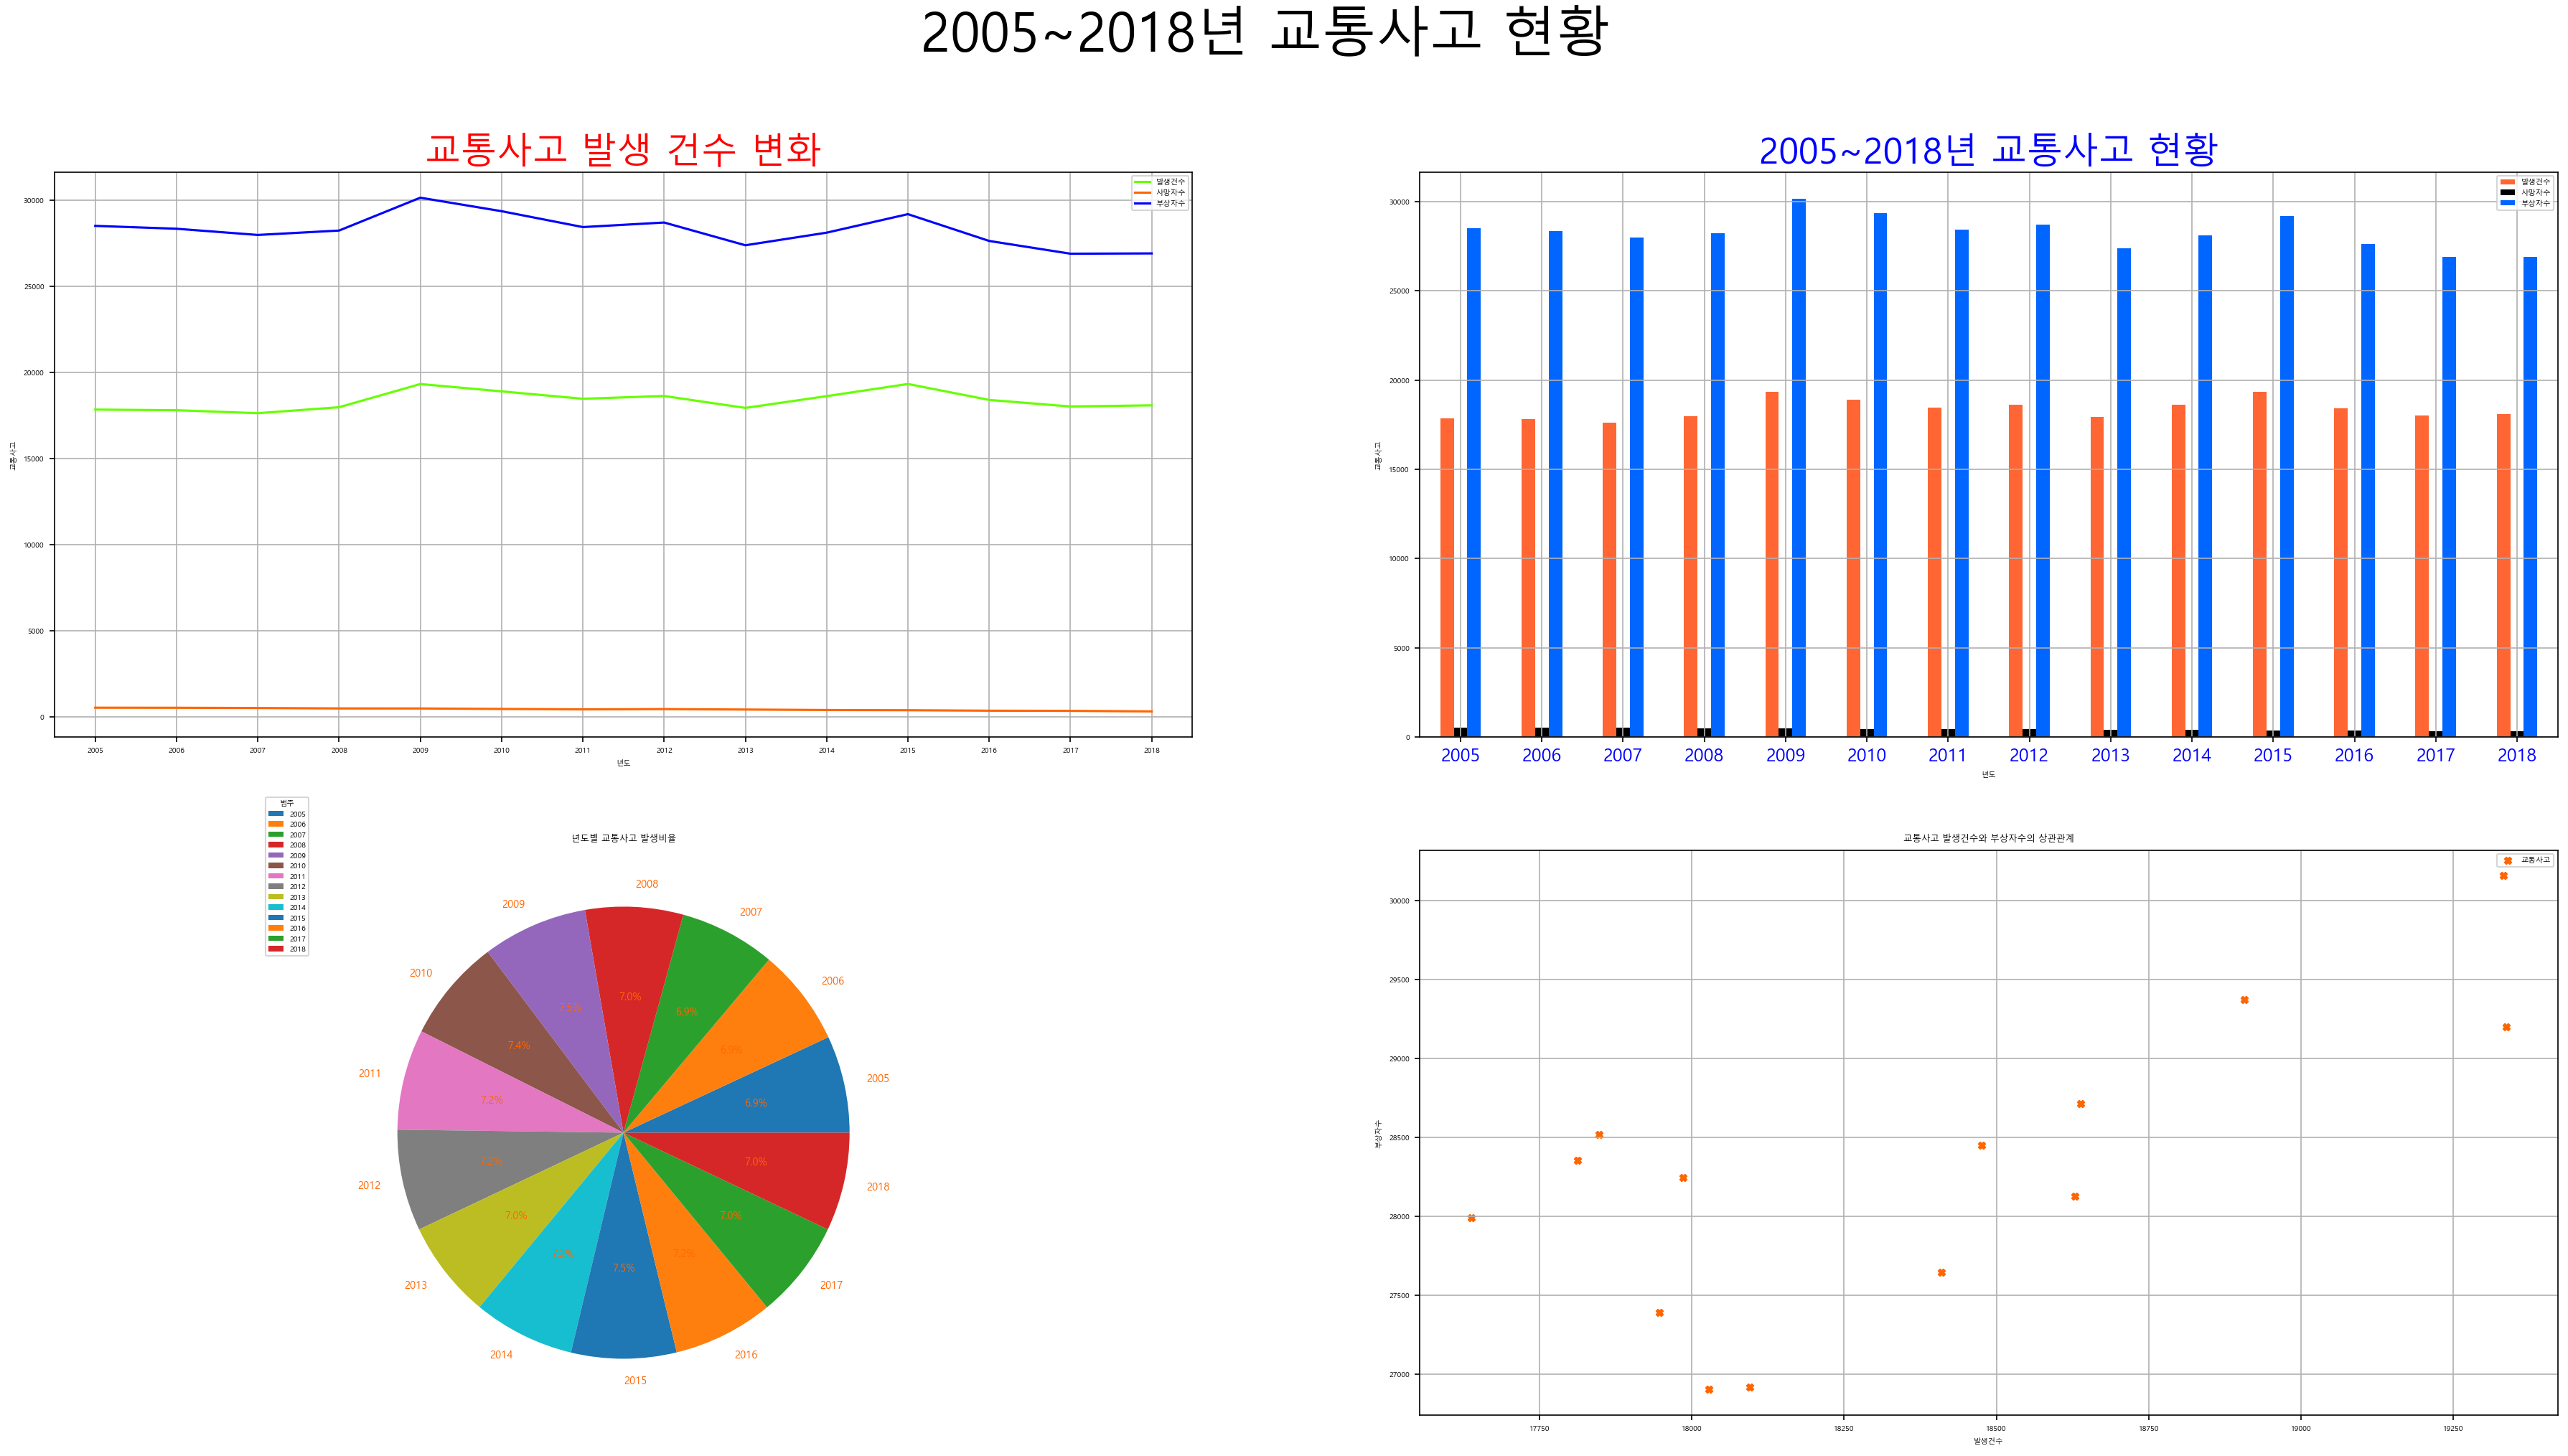

In [85]:
# 1) 그래프 만들고 각각 영역을 주석으로 코드 문단을 나눠놓는다.
# 2) 각 영역에 해당하는 코드를 작성한다.
# 일반적으로 n*m 영역을 다른 그래프를 그릴경우 서브플롯을 사용하지 않고 그냥 n*m개의 그래프를 각각 그린다.

#--------------------------------------------------------------
# 2행 2열의 영역을 생성한다 (그래프 만들기)
#--------------------------------------------------------------
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 15))

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
# fig.subplots_adjust(wspace=0.2, hspace=0.3) # 안적어도 상관없음 => 주석처리

#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#--------------------------------------------------------------
origin.plot(ax=ax1, color=['#66ff00', '#ff6600', '#0000ff'])

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')
ax1.grid()
# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# plt을 직접 사용할 경우 xticks(좌표리스트, 텍스트리스트) 형식으로 지정 하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
start = min(origin.index)
end = max(origin.index)
x = list(range(start, end+1))
# -> 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
# ax1.set_xticklabels(origin.index, fontsize=12, color='#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
# ax1.set_ylim([0, 30000])

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
origin.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(len(origin.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(origin.index, fontsize=12, color='#0000ff')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel='년도', ylabel='교통사고')

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프
origin['발생건수'].plot.pie(ax=ax3, labels=origin.index, autopct="%0.1f%%",
                        textprops={'color':"#ff6600", 'fontsize': 7})

# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생비율")

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=origin.index, title='범주', bbox_to_anchor=(-0.05, 1.1))

#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프
origin.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color='#ff6600', marker='X', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축,y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

#--------------------------------------------------------------
# 그래프 출력하기
#--------------------------------------------------------------
plt.show()
plt.close()

## #05. 두 개의 y축을 갖는 그래프

### 1) 샘플 데이터 만들기

#### x축 데이터 (공용)

In [46]:
x = list(range(10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 첫 번째 y축 데이터

In [47]:
y1 = list(range(10))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 두 번째 y축 데이터

In [86]:
y2 = list(range(0, 500, 50))
y2

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]

### 2) 기본 그래프 구현

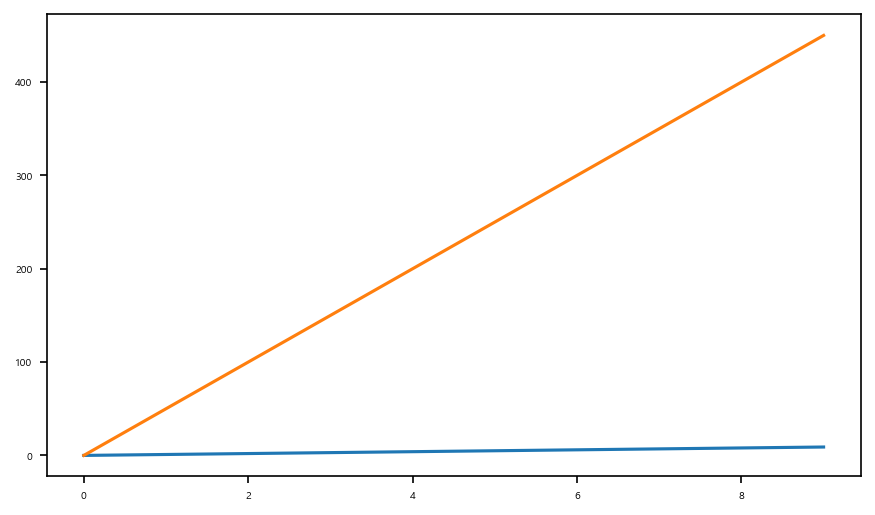

In [67]:
plt.figure(figsize=(7,4))
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

### 2) 서브플롯으로 2개의 y축을 갖는 그래프 구현

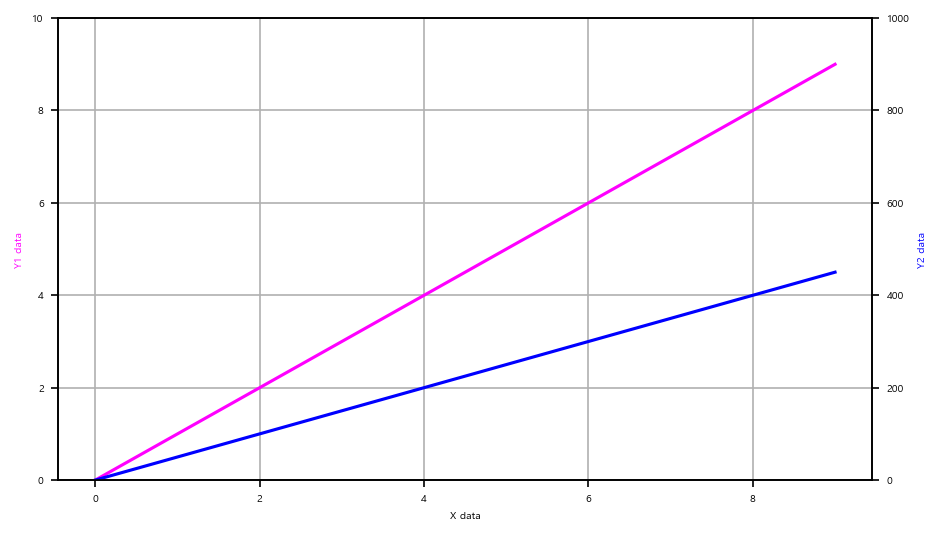

In [74]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1, figsize=(7, 4)) # 1행 1열짜리 서브플롯

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color="#ff00ff")
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='#ff00ff')
ax1.grid()
ax1.set_ylim([0, 10])

# ax2에 그래프 그리기
ax2.plot(x, y2, color="#0000ff")
ax2.set_ylabel('Y2 data', color='#0000ff')
ax2.set_ylim([0, 1000])

plt.show()
plt.close()

## 06. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기

우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.

이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자.

#### 그래프 그리기

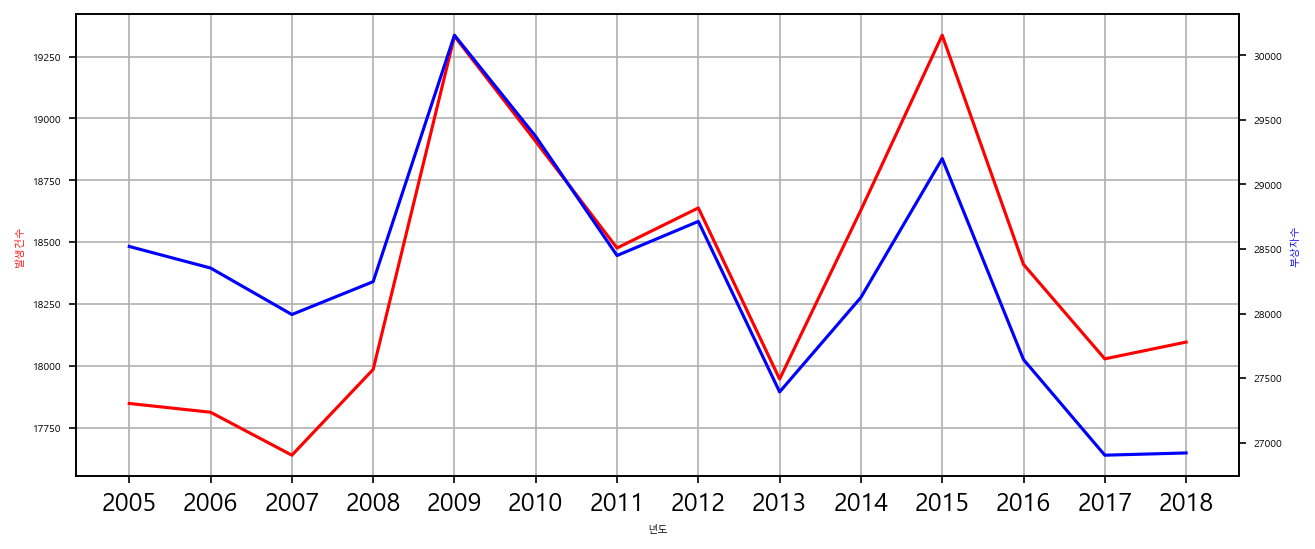

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))   # 그래프 시작
ax2 = ax1.twinx()             # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
origin['발생건수'].plot(ax=ax1, color='#ff0000')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(origin.index)
end = max(origin.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(origin.index, fontsize=12, color='#000000')

# ax2에 그래프 그리기
origin['부상자수'].plot(ax=ax2, color='#0000ff')
ax2.set_ylabel('부상자수', color='#0000ff')

plt.show()
plt.close()